### imports

In [1]:
import os
import sys
import cv2
import numpy as np
import functools
import glob
import matplotlib.pyplot as plt

# extract both the hing and cold features
from utils import *
from feature_extrator import *
from svm_train import *

### example

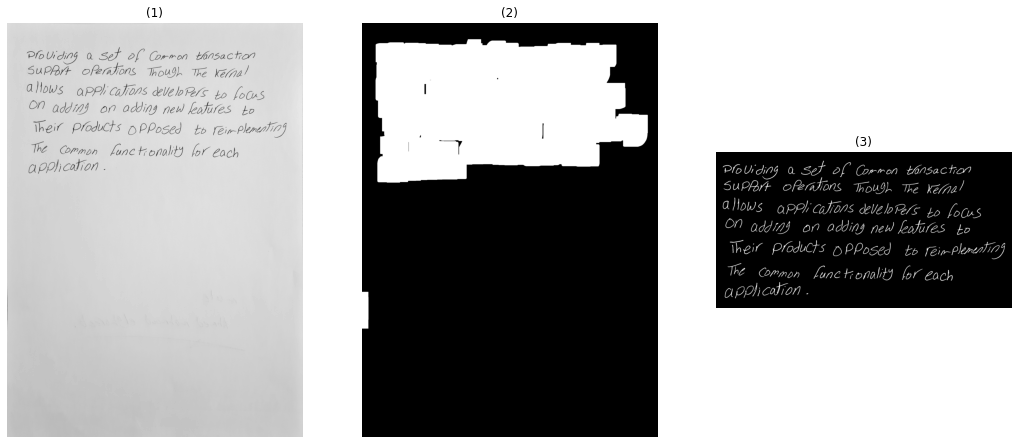

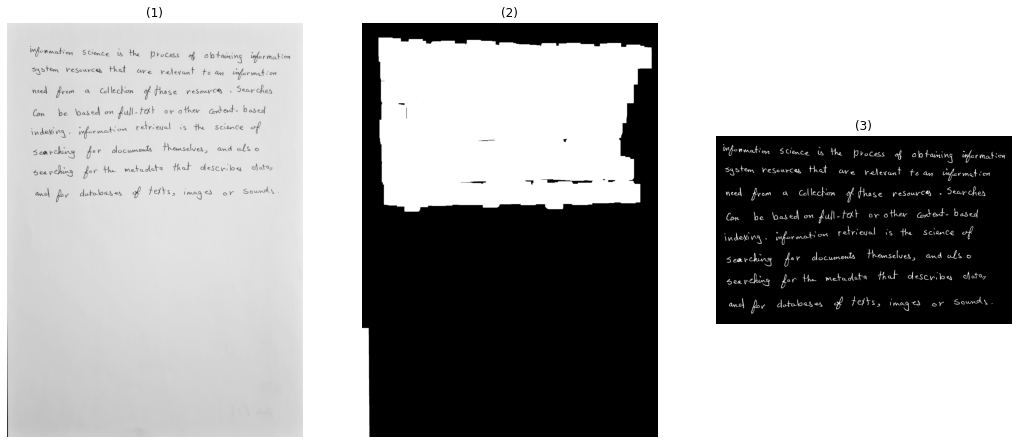

In [2]:

x_cut_percent = 0.1
y_cut_percent = 0.5
gkernel = (9,9)
thresh_block_size = 101
thresh_c = 30
dilation_size = (15,20)
dilation_iterations = 8

male_example = "./data-set/males/M10.jpg"
male_after = preprocess(
    male_example,
    x_cut_percent,
    y_cut_percent,
    gkernel,
    thresh_block_size,
    thresh_c,
    dilation_size,
    dilation_iterations,
    show_steps=True
)

female_example = "./data-set/females/F10.jpg"
female_after = preprocess(
    female_example,
    x_cut_percent,
    y_cut_percent,
    gkernel,
    thresh_block_size,
    thresh_c,
    dilation_size,
    dilation_iterations,
    show_steps=True
)

### using hinge and cold features

In [3]:
%%time

all_images = glob.glob("./data-set/*/*")

x_cut_percent = 0.1
y_cut_percent = 0.5
gkernel = (9,9)
thresh_block_size = 101
thresh_c = 30
dilation_size = (15,20)
dilation_iterations = 8

for image_path in all_images:
    preprocess(
        image_path,
        x_cut_percent,
        y_cut_percent,
        gkernel,
        thresh_block_size,
        thresh_c,
        dilation_size,
        dilation_iterations 
    )
    

CPU times: user 4min 21s, sys: 7.52 s, total: 4min 29s
Wall time: 4min 3s


In [4]:
%%time

hinge_feature_vectors, cold_feature_vectors, labels, label_names = extract_feat("./preprocessed/data-set/")
save_feat("./features", hinge_feature_vectors, cold_feature_vectors, labels, label_names)


['females', 'males']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 131/131 [06:21<00:00,  2.92s/it]


[STATUS] processed folder: females


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 232/232 [10:59<00:00,  2.84s/it]

[STATUS] processed folder: males
Saved all hinge and cold features
CPU times: user 17min 28s, sys: 2.85 s, total: 17min 31s
Wall time: 17min 21s


In [8]:
svm_train(feat("cold_features.npy"), feat("labels.npz"))


./features/cold_features.npy svm_cold_features_train.pkl


0.726027397260274

In [11]:
svm_train(feat("hinge_features.npy"), feat("labels.npz"))


./features/hinge_features.npy svm_hinge_features_train.pkl


0.8767123287671232